In [1]:
import pandas as pd
import konlpy
import gensim

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
- Train, Test Îç∞Ïù¥ÌÑ∞

In [3]:
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

In [4]:
train_data.head()

id                                           document  label
0   9976970                                ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨      0
1   3819312                  Ìù†...Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§Ñ....Ïò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò      1
2  10265843                                  ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§      0
3   9045019                      ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ..ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§..ÌèâÏ†ê Ï°∞Ï†ï      0
4   6483659  ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôî!Ïä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ ...      1

In [172]:
train_data.shape, test_data.shape

((150000, 3), (50000, 3))

## Train Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


#### info Î©îÏÜåÎìúÎ°ú ÌôïÏù∏ Í≤∞Í≥º
- Ï¥ù 150000 Îç∞Ïù¥ÌÑ∞ Ï§ë documentÎäî 149995Î°ú ÌôïÏù∏
- Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏

In [19]:
# trainÎç∞Ïù¥ÌÑ∞ Ï§ë documentÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏
train_data[train_data['document'].isnull()]

id document  label
25857   2172111      NaN      1
55737   6369843      NaN      1
110014  1034280      NaN      0
126782  5942978      NaN      0
140721  1034283      NaN      0

In [27]:
# Í∞ÅÍ∞Å ÌôïÏù∏Ìï¥Î≥¥Í∏∞
train_data[train_data['id'].isnull()], train_data[train_data['label'].isnull()], train_data[train_data['document'].isnull()]

(Empty DataFrame
 Columns: [id, document, label]
 Index: [],
 Empty DataFrame
 Columns: [id, document, label]
 Index: [],
              id document  label
 25857   2172111      NaN      1
 55737   6369843      NaN      1
 110014  1034280      NaN      0
 126782  5942978      NaN      0
 140721  1034283      NaN      0)

In [30]:
# Ï§ëÎ≥µ ÌôïÏù∏ 3817Í∞ú
train_data[train_data['document'].duplicated()]

id document  label
1058    5890638        4      0
1097    2062443       ÏµùÏò§      1
1248    3502685       ÏµúÍ≥†      1
1483     775332       ÏµúÍ≥†      1
1707    8009134      Ïû¨Î∞åÎã§      1
...         ...      ...    ...
149919  6502490        Ïß±      1
149949  3924716    OO ÏòÅÌôî      0
149960  6368431     ÏßÄÎ£®ÌïòÎã§      0
149966  6735753        1      0
149987  7669621  Ïû¨ÎØ∏ÏûàÏñ¥Ïöî^^      1

[3817 rows x 3 columns]

## ÌòïÌÉúÏÜå ÏÇ¨Ï†ÑÍ≥º Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî ÎßåÎì§Í∏∞
 
> KoNLPyÏùò ÌòïÌÉúÏÜå Î∂ÑÏÑù Ï¢ÖÎ•ò ([üîó](https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html))
> - Hannanum: ÌïúÎÇòÎàî. KAIST Semantic Web Research Center Í∞úÎ∞ú.
    - http://semanticweb.kaist.ac.kr/hannanum/
> - Kkma: Íº¨Íº¨Îßà. ÏÑúÏö∏ÎåÄÌïôÍµê IDS(Intelligent Data Systems) Ïó∞Íµ¨Ïã§ Í∞úÎ∞ú.
    - http://kkma.snu.ac.kr/
> - Komoran: ÏΩîÎ™®ÎûÄ. ShinewareÏóêÏÑú Í∞úÎ∞ú.
    - https://github.com/shin285/KOMORAN
> - Mecab: Î©îÏπ¥Î∏å. ÏùºÎ≥∏Ïñ¥Ïö© ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î•º ÌïúÍµ≠Ïñ¥Î•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù ÏàòÏ†ï.
    - https://bitbucket.org/eunjeon/mecab-ko
> - Open Korean Text: Ïò§Ìîà ÏÜåÏä§ ÌïúÍµ≠Ïñ¥ Î∂ÑÏÑùÍ∏∞. Í≥ºÍ±∞ Ìä∏ÏúÑÌÑ∞ ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞.
    - https://github.com/open-korean-text/open-korean-text

#### ÌòïÌÉúÏÜå Î∂ÑÏÑù ÏÑ†ÌÉù Î∞è Ï§ëÎ≥µ, Í≤∞Ï∏°Ïπò Ï†úÍ±∞

In [7]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

In [53]:
# mecab ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ ÏÇ¨Ïö©
# Î∂àÏö©Ïñ¥ Ï†ïÏùò
tokenizer = Mecab()
stopwords = ['Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§']

In [54]:
# drop_duplicates : Ï§ëÎ≥µÍ∞í Ï†úÍ±∞ (Í≤∞Ï∏°Ïπò Ï§ëÎ≥µ Ìè¨Ìï® : 3817)
# dropna : Í≤∞Ï∏°Ïπò Ï†úÍ±∞ (Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ ÎÇ®ÏùÄ Í≤∞Ï∏°Ïπò : 1)
# 15000 - 3817 -1 = 146182
train_data_nonNa = train_data.drop_duplicates(subset=['document'])
train_data_nonNa = train_data_nonNa.dropna(how = 'any')
train_data_nonNa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146182 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        146182 non-null  int64 
 1   document  146182 non-null  object
 2   label     146182 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.5+ MB


#### tokenÌôî Î∞è Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨

In [114]:
# tokenizer Ï≤òÎ¶¨ ÏòàÏãú
def sentence2token(sentence):
    token = tokenizer.morphs(sentence)
    print('Í∏∞Î≥∏ : {}'.format(sentence))
    print('tokenÌôî : {}'.format(token))
    return token

# trainÏóêÏÑú Î¨∏Ïû• ÌïòÎÇò Í∞ÄÏ†∏Ïò§Í∏∞
sentence_num = 0
# token ÏÉùÏÑ±
temp = sentence2token(sentence=train_data_nonNa.loc[sentence_num,"document"])
# Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨
temp = [word for word in temp if not word in stopwords]
print(f'Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ : {temp}')

Í∏∞Î≥∏ : ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨
tokenÌôî : ['ÏïÑ', 'Îçî', 'Îπô', '.', '.', 'ÏßÑÏßú', 'ÏßúÏ¶ù', 'ÎÇò', 'ÎÑ§Ïöî', 'Î™©ÏÜåÎ¶¨']
Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ : ['ÏïÑ', 'Îçî', 'Îπô', '.', '.', 'ÏßÑÏßú', 'ÏßúÏ¶ù', 'ÎÇò', 'ÎÑ§Ïöî', 'Î™©ÏÜåÎ¶¨']


In [87]:
# trainÏóê ÏûàÎäî Î™®Îì† Î¨∏Ïû•ÏùÑ ÌÜ†ÌÅ∞Ìôî Î∞è Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ÌõÑ ÌÜ†ÌÅ∞ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
X_train = []
for sentence in train_data_nonNa['document']:
    temp_X = tokenizer.morphs(sentence) # ÌÜ†ÌÅ∞Ìôî
    temp_X = [word for word in temp_X if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    X_train.append(temp_X)

In [88]:
# ÌÜ†ÌÅ∞ Î¶¨Ïä§Ìä∏
print(X_train[:3])

[['ÏïÑ', 'Îçî', 'Îπô', '.', '.', 'ÏßÑÏßú', 'ÏßúÏ¶ù', 'ÎÇò', 'ÎÑ§Ïöî', 'Î™©ÏÜåÎ¶¨'], ['Ìù†', '.', '..', 'Ìè¨Ïä§ÌÑ∞', 'Î≥¥Í≥†', 'Ï¥àÎî©', 'ÏòÅÌôî', 'Ï§Ñ', '.', '...', 'Ïò§Î≤Ñ', 'Ïó∞Í∏∞', 'Ï°∞Ï∞®', 'Í∞ÄÎ≥ç', 'ÏßÄ', 'Ïïä', 'Íµ¨ÎÇò'], ['ÎÑàÎ¨¥', 'Ïû¨', 'Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§']]


#### ÏÇ¨Ï†Ñ Ï†ïÏùò

In [89]:
# X_trainÏùÄ Í∞Å documentÏóê Ï°¥Ïû¨ÌïòÎäî ÌÜ†ÌÅ∞Ïù¥ Î¶¨Ïä§Ìä∏Î°ú ÌïúÏ∞®Î°Ä Îçî ÎÇòÎà†Ï†∏ ÏûàÏùå (2Ï∞®Ïõê)
# Í∞Å Î¶¨Ïä§Ìä∏Ïóê Ï°¥Ïû¨ÌïòÎäî ÌÜ†ÌÅ∞ÏùÑ ÌïòÎÇòÏùò Î¶¨Ïä§Ìä∏Î°ú Í≤∞Ìï©
words = np.concatenate(X_train).tolist()
print(len(words))

2336238


In [90]:
# list -> dict
counter = Counter(words)
print(len(counter))

53961


In [91]:
# Í∞ÄÏû• ÎßéÏù¥ ÏÇ¨Ïö©Îêú ÏàúÏúºÎ°ú 9996Í∞ú Ï∂îÏ∂ú
counter = counter.most_common(10000-4)
print(len(counter))

9996


In [104]:
# ÏïûÏóê 4Í∞úÏùò Îπà ÏõêÏÜåÍ∞Ä ÏûàÎäî Î¶¨Ïä§Ìä∏Î•º Ï∂îÍ∞Ä
vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
print(vocab)

['<PAD>', '<BOS>', '<UNK>', '<UNUSED>', '.', 'ÏòÅÌôî', 'Îã§', 'Í≥†', 'Ìïò', 'ÏùÑ', 'Î≥¥', '..', 'Í≤å', ',', '!', 'ÏßÄ', 'Ïûà', 'ÏóÜ', '?', 'Ï¢ã', 'ÎÇò', 'Ïóà', 'Îßå', 'ÎäîÎç∞', 'ÎÑàÎ¨¥', 'Î¥§', 'Ï†Å', 'Ïïà', 'Ï†ïÎßê', 'Î°ú', 'Ïùå', 'Í≤É', 'ÏïÑ', 'ÎÑ§Ïöî', 'Ïû¨Î∞å', 'Ïñ¥', 'Í∞ô', 'Ï†ê', 'ÏßÄÎßå', 'ÏßÑÏßú', 'Ìñà', 'ÏóêÏÑú', 'Í∏∞', 'ÎÑ§', 'Ïïä', 'Í±∞', 'Ïïò', 'Ïàò', 'Îêò', 'Î©¥', '„Öã„Öã', 'Îßê', 'Ïó∞Í∏∞', 'Ïù∏', 'Ï£º', 'ÎÇ¥', 'ÏµúÍ≥†', '~', 'ÌèâÏ†ê', 'Ïù¥Îü∞', 'Îçò', 'Ïñ¥Ïöî', 'Ìï†', 'Ïôú', 'Í≤†', '1', 'Ïä§ÌÜ†Î¶¨', 'Ìï¥', 'ÏäµÎãàÎã§', '„Öã„Öã„Öã', '...', 'ÎìúÎùºÎßà', 'ÏÉùÍ∞Å', 'ÏïÑÎãà', 'Îçî', 'Í∑∏', 'Ïã∂', 'ÏÇ¨Îûå', 'ÎìØ', 'Îïå', 'Í∞êÎèô', 'Ìï®', 'Î∞∞Ïö∞', 'Î≥∏', 'ÍπåÏßÄ', 'Î≠ê', 'Ïïå', 'ÎßåÎì§', 'ÎÇ¥Ïö©', 'Î≥º', 'Í∞êÎèÖ', 'Î≥¥Îã§', 'Îùº', 'Í∑∏ÎÉ•', 'Ïû¨ÎØ∏', 'ÏãúÍ∞Ñ', 'ÏßÄÎ£®', 'Ï§ë', 'Ïû¨ÎØ∏Ïûà', 'ÎÖÑ', '10', 'ÏòÄ', 'Ïûº', 'ÏÇ¨Îûë', 'Î™ª', 'ÎÉê', 'Ïû¨ÎØ∏ÏóÜ', 'Ïì∞Î†àÍ∏∞', 'ÏÑú', '2', 'ÎùºÍ≥†', 'Ïïº', 'Îãà', 'Î©¥ÏÑú', 'Î≤à', 'Îã§Ïãú', 'ÎÇòÏò§', 'ÏûëÌíà', 'Ïù¥Í±∞', 'ÌïòÎÇò', 'Ï§Ñ', 'Ìï¥

In [105]:
# 'Î¨∏Ïûê':Ïù∏Îç±Ïä§ Î°ú Î≥ÄÌôò
word_to_index = {word:index for index, word in enumerate(vocab)}
print(len(word_to_index))

10000


In [124]:
index_to_word = {index:word for word, index in word_to_index.items()}
print(len(index_to_word))

10000


In [108]:
# Í∞Å Î¶¨Ïä§Ìä∏Ïóê Ï°¥Ïû¨ÌïòÎäî Îã®Ïñ¥Î•º Ïà´ÏûêÎ°ú Î≥ÄÌôò
# word_to_indexÏóê ÏóÜÎäî Îã®Ïñ¥Í∞Ä ÎÇòÏò§Î©¥ <UNK>:2ÏúºÎ°ú Î≥ÄÌôò
def wordlist_to_indexlist(wordlist):
    return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        
train_X = list(map(wordlist_to_indexlist, X_train))

In [109]:
for a,b in zip(X_train[:5], train_X[:5]):
    print(f'ÏõêÎ¨∏ : {a}')
    print(f'Î≥ÄÌôò : {b}')

ÏõêÎ¨∏ : ['ÏïÑ', 'Îçî', 'Îπô', '.', '.', 'ÏßÑÏßú', 'ÏßúÏ¶ù', 'ÎÇò', 'ÎÑ§Ïöî', 'Î™©ÏÜåÎ¶¨']
Î≥ÄÌôò : [32, 74, 919, 4, 4, 39, 228, 20, 33, 748]
ÏõêÎ¨∏ : ['Ìù†', '.', '..', 'Ìè¨Ïä§ÌÑ∞', 'Î≥¥Í≥†', 'Ï¥àÎî©', 'ÏòÅÌôî', 'Ï§Ñ', '.', '...', 'Ïò§Î≤Ñ', 'Ïó∞Í∏∞', 'Ï°∞Ï∞®', 'Í∞ÄÎ≥ç', 'ÏßÄ', 'Ïïä', 'Íµ¨ÎÇò']
Î≥ÄÌôò : [1028, 4, 11, 519, 549, 687, 5, 120, 4, 70, 1639, 52, 925, 1006, 15, 44, 391]
ÏõêÎ¨∏ : ['ÎÑàÎ¨¥', 'Ïû¨', 'Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§']
Î≥ÄÌôò : [24, 205, 2]
ÏõêÎ¨∏ : ['ÍµêÎèÑÏÜå', 'Ïù¥ÏïºÍ∏∞', 'Íµ¨Î®º', '.', '.', 'ÏÜîÏßÅÌûà', 'Ïû¨ÎØ∏', 'ÏóÜ', 'Îã§', '.', '.', 'ÌèâÏ†ê', 'Ï°∞Ï†ï']
Î≥ÄÌôò : [8409, 158, 3925, 4, 4, 298, 94, 17, 6, 4, 4, 58, 3479]
ÏõêÎ¨∏ : ['ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏', 'ÏùµÏÇ¥', 'Ïä§Îü∞', 'Ïó∞Í∏∞', 'ÎèãÎ≥¥ÏòÄ', 'Îçò', 'ÏòÅÌôî', '!', 'Ïä§ÌååÏù¥ÎçîÎß®', 'ÏóêÏÑú', 'Îäô', 'Ïñ¥', 'Î≥¥Ïù¥', 'Í∏∞', 'Îßå', 'Ìñà', 'Îçò', 'Ïª§Ïä§Ìã¥', 'ÎçòÏä§Ìä∏', 'ÎÑàÎ¨¥ÎÇò', 'Ïù¥Îªê', 'Î≥¥ÏòÄ', 'Îã§']
Î≥ÄÌôò : [2, 8894, 1108, 52, 2832, 60, 5, 14, 2758, 41, 1188, 35, 351, 42, 22, 40, 60, 2, 2, 

In [130]:
# Î¨∏Ïû• encode : str -> int
# Ï≤òÏùåÏóê BOS Ï∂îÍ∞Ä Î∞è Î™®Î•¥Îäî Îã®Ïñ¥ UNKÎ°ú Î≥ÄÌôò
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in tokenizer.morphs(sentence)]

def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# Î¨∏Ïû• decode : int -> str
# <BOS>Î•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Îã®Ïñ¥Îì§ÏùÑ decode (encoded_sentece[1:])
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]Î•º ÌÜµÌï¥ <BOS>Î•º Ï†úÏô∏

def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [144]:
temp_a = get_encoded_sentence(train_data_nonNa.loc[0, 'document'], word_to_index=word_to_index)
print(temp_a)

[1, 32, 74, 919, 4, 4, 39, 228, 20, 33, 748]


In [145]:
get_decoded_sentence(temp_a, index_to_word=index_to_word)

'ÏïÑ Îçî Îπô . . ÏßÑÏßú ÏßúÏ¶ù ÎÇò ÎÑ§Ïöî Î™©ÏÜåÎ¶¨'

### Î≥ÄÏàò Ï†ïÎ¶¨
- train_data, test_data : txt ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞
- train_data_nonNa : train_dataÏóêÏÑú Ï§ëÎ≥µ Î∞è Í≤∞Ï∏°Ïπò Ï†úÍ±∞
- tokenizer = Mecab() : Mecab Î∂ÑÏÑùÍ∏∞Î•º ÏÇ¨Ïö©ÌïòÎäî Î≥ÄÏàò
- X_train : train_dataÏóê ÏûàÎäî Í∞Å Î¨∏Ïû• Î¶¨Ïä§Ìä∏Í∞Ä ÌÜ†ÌÅ∞ÏúºÎ°ú Î≥ÄÌôòÎêú Î¶¨Ïä§Ìä∏
- words : X_trainÏóê ÏûàÎäî Î™®Îì† ÌÜ†ÌÅ∞Ïùò Î¶¨Ïä§Ìä∏
- vocab : <PAD>, <BOS>, <UNK>, <UNUSED>Î•º Ï∂îÍ∞ÄÌïú ÏÇ¨Ï†Ñ Î¶¨Ïä§Ìä∏
- word_to_index : Î¨∏Ïûê:Ïù∏Îç±Ïä§ ÌòïÌÉúÏùò ÏÇ¨Ï†Ñ dict
- index_to_word : Ïù∏Îç±Ïä§:Î¨∏Ïûê ÌòïÌÉúÏùò ÏÇ¨Ï†Ñ dict
- train_X : X_trainÏùò ÌÜ†ÌÅ∞Ïù¥ Ïà´ÏûêÎ°ú Î≥ÄÌòïÎêú Î¶¨Ïä§Ìä∏

### Î¨∏Ïû• Í∏∏Ïù¥ ÎπÑÍµê

In [137]:
num_tokens = [len(tokens) for tokens in X_train]
num_tokens = np.array(num_tokens)

print('Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑† : ', np.mean(num_tokens))
print('Î¨∏Ïû•Í∏∏Ïù¥ ÏµúÎåÄ : ', np.max(num_tokens))
print('Î¨∏Ïû•Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞® : ', np.std(num_tokens))

max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)

print('pad_sequences maxlen : ', maxlen)
print(f'Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò {np.sum(num_tokens < max_tokens) / len(num_tokens)}%Í∞Ä maxlen ÏÑ§Ï†ïÍ∞í Ïù¥ÎÇ¥Ïóê Ìè¨Ìï®Îê©ÎãàÎã§. ')

Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑† :  15.98170773419436
Î¨∏Ïû•Í∏∏Ïù¥ ÏµúÎåÄ :  116
Î¨∏Ïû•Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞® :  12.82473766384545
pad_sequences maxlen :  41
Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò 0.9341711017772366%Í∞Ä maxlen ÏÑ§Ï†ïÍ∞í Ïù¥ÎÇ¥Ïóê Ìè¨Ìï®Îê©ÎãàÎã§. 


## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [138]:
import tensorflow as tf
from tensorflow import keras

In [149]:
# train_data_nonNaÏóê ÏûàÎäî document Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê encode
x_train = get_encoded_sentences(train_data_nonNa.loc[:,'document'], word_to_index=word_to_index)

In [150]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(
    x_train, value=word_to_index["<PAD>"], padding='pre', maxlen=maxlen
)

In [173]:
x_train.shape

(146182, 41)

In [152]:
y_train = train_data_nonNa.loc[:,'label']

#### test Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [174]:
test_data.shape

(50000, 3)

In [188]:
def preprocess_data(data, word_to_index):
    # Ï§ëÎ≥µ Î∞è Í≤∞Ï∏°Ïπò Ï†úÍ±∞
    data = data.drop_duplicates(subset=['document'])
    data = data.dropna(how='any')
    print(data.shape)
    
    # trainÏóêÏÑú ÏÇ¨Ïö©Ìïú word_to_indexÎ•º Í∞ÄÏ†∏ÏôÄ test Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
    x_data = get_encoded_sentences(data['document'] , word_to_index)

    return x_data, data.loc[:,'label']

In [189]:
x_test, y_test = preprocess_data(test_data, word_to_index)

(49157, 3)


In [194]:
get_decoded_sentences(x_test, index_to_word)[:5]

['Íµ≥ „Öã',
 '<UNK>',
 'Î≠ê Ïïº <UNK> ÌèâÏ†ê <UNK> <UNK> . ... ÎÇòÏÅò ÏßÑ Ïïä ÏßÄÎßå 10 Ï†ê ÏßúÎ¶¨ <UNK> ÎçîÎçîÏö± ÏïÑÎãà ÏûñÏïÑ',
 'ÏßÄÎ£® Ìïò ÏßÄ <UNK> Ïïä ÏùÄÎç∞ ÏôÑÏ†Ñ ÎßâÏû• ÏûÑ . .. Îèà Ï£º Í≥† Î≥¥ Í∏∞ <UNK> <UNK> . ...',
 '3 D Îßå ÏïÑÎãà Ïóà Ïñ¥ÎèÑ Î≥Ñ Îã§ÏÑØ Í∞ú Ï§¨ ÏùÑ ÌÖêÎç∞ . . Ïôú 3 D Î°ú ÎÇòÏôÄÏÑú Ï†ú <UNK> <UNK> Î∂àÌé∏ Ìïò Í≤å Ìïò Ï£† ? ?']

In [200]:
len(x_test), y_test.shape

(49157, (49157,))

In [197]:
x_test = tf.keras.preprocessing.sequence.pad_sequences(
    x_test, value=word_to_index["<PAD>"], padding='pre', maxlen=maxlen
)

In [199]:
x_test.shape

(49157, 41)

## Model ÌïôÏäµ

In [221]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(
    x_train, y_train, test_size=0.2, random_state=2000
)

In [241]:
input_shape = x_train.shape[-1]
voca_size = len(word_to_index) # input_dim
word_vector_dim = 16 # ÏõåÎìú Î≤°ÌÑ∞ Ï∞®Ïõê Ïàò (output_dim)

input_shape, voca_size, word_vector_dim

(41, 10000, 16)

### Í∏∞Î≥∏ Dense

In [242]:
def get_dense_model(input_shape, voca_size, word_vector_dim):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Embedding(voca_size, word_vector_dim, input_shape=(None, ))(inputs)
    x = keras.layers.Dense(8, activation='relu')(x)
    x = keras.layers.Dense(16, activation='relu')(x)
    outputs = keras.layers.Dense(1, activation='sigmoid')(x)
    
    return keras.Model(inputs,outputs)

In [243]:
dense_model = get_dense_model(input_shape, voca_size, word_vector_dim)
dense_model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 41)]              0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 41, 16)            160000    
_________________________________________________________________
dense_12 (Dense)             (None, 41, 8)             136       
_________________________________________________________________
dense_13 (Dense)             (None, 41, 16)            144       
_________________________________________________________________
dense_14 (Dense)             (None, 41, 1)             17        
Total params: 160,297
Trainable params: 160,297
Non-trainable params: 0
_________________________________________________________________


In [244]:
dense_model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_dense = dense_model.fit(
    train_x, train_y,
    validation_data=(val_x, val_y),
    epochs = 20,
    batch_size=256
)

Epoch 1/20
457/457 [==============================] - 3s 5ms/step - loss: 0.6827 - accuracy: 0.5353 - val_loss: 0.6765 - val_accuracy: 0.5419
Epoch 2/20
457/457 [==============================] - 2s 5ms/step - loss: 0.6739 - accuracy: 0.5424 - val_loss: 0.6748 - val_accuracy: 0.5425
Epoch 3/20
457/457 [==============================] - 2s 5ms/step - loss: 0.6731 - accuracy: 0.5422 - val_loss: 0.6748 - val_accuracy: 0.5428
Epoch 4/20
457/457 [==============================] - 2s 5ms/step - loss: 0.6728 - accuracy: 0.5434 - val_loss: 0.6750 - val_accuracy: 0.5374
Epoch 5/20
457/457 [==============================] - 2s 5ms/step - loss: 0.6727 - accuracy: 0.5438 - val_loss: 0.6750 - val_accuracy: 0.5377
Epoch 6/20
457/457 [==============================] - 2s 5ms/step - loss: 0.6727 - accuracy: 0.5402 - val_loss: 0.6749 - val_accuracy: 0.5426
Epoch 7/20
457/457 [==============================] - 2s 5ms/step - loss: 0.6726 - accuracy: 0.5441 - val_loss: 0.6749 - val_accuracy: 0.5431
Epoch 

In [245]:
results = dense_model.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.6751 - accuracy: 0.5349
[0.6751322746276855, 0.5349483489990234]


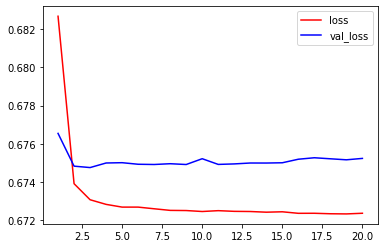

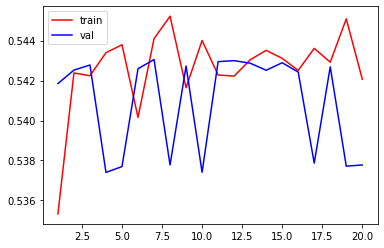

In [246]:
import matplotlib.pyplot as plt

plt.plot(range(1,21), history_dense.history['loss'], 'r', label='loss')
plt.plot(range(1,21), history_dense.history['val_loss'], 'b', label='val_loss')
plt.legend()
plt.show()

plt.plot(range(1,21), history_dense.history['accuracy'], 'r', label='train')
plt.plot(range(1,21), history_dense.history['val_accuracy'], 'b', label='val')
plt.legend()
plt.show()

### Conv1d Net

In [222]:
def get_conv_model(input_shape, voca_size, word_vector_dim):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Embedding(voca_size, word_vector_dim, input_shape=(None, ))(inputs)
    x = keras.layers.Conv1D(16,5,activation='relu')(x)
    x = keras.layers.MaxPooling1D(3)(x)
    x = keras.layers.Conv1D(16, 5, activation='relu')(x)
    x = keras.layers.GlobalMaxPooling1D()(x)
    x =keras.layers.Dense(8, activation='relu')(x)
    outputs = keras.layers.Dense(1, activation='sigmoid')(x)
    
    return keras.Model(inputs,outputs)

In [228]:
conv_model = get_conv_model(input_shape, voca_size, word_vector_dim)
conv_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 41)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 41, 16)            160000    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 37, 16)            1296      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 12, 16)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 8, 16)             1296      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136 

In [229]:
conv_model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [230]:
history = conv_model.fit(
    train_x, train_y,
    validation_data=(val_x, val_y),
    epochs = 20,
    batch_size=256
)

Epoch 1/20
457/457 [==============================] - 3s 5ms/step - loss: 0.4573 - accuracy: 0.7784 - val_loss: 0.3730 - val_accuracy: 0.8330
Epoch 2/20
457/457 [==============================] - 2s 5ms/step - loss: 0.3296 - accuracy: 0.8567 - val_loss: 0.3574 - val_accuracy: 0.8413
Epoch 3/20
457/457 [==============================] - 2s 5ms/step - loss: 0.2915 - accuracy: 0.8759 - val_loss: 0.3622 - val_accuracy: 0.8411
Epoch 4/20
457/457 [==============================] - 2s 5ms/step - loss: 0.2570 - accuracy: 0.8942 - val_loss: 0.3696 - val_accuracy: 0.8415
Epoch 5/20
457/457 [==============================] - 2s 5ms/step - loss: 0.2215 - accuracy: 0.9125 - val_loss: 0.3957 - val_accuracy: 0.8403
Epoch 6/20
457/457 [==============================] - 2s 5ms/step - loss: 0.1865 - accuracy: 0.9290 - val_loss: 0.4357 - val_accuracy: 0.8314
Epoch 7/20
457/457 [==============================] - 2s 5ms/step - loss: 0.1553 - accuracy: 0.9428 - val_loss: 0.4895 - val_accuracy: 0.8306
Epoch 

In [238]:
results = conv_model.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 1.2357 - accuracy: 0.8082
[1.2356936931610107, 0.8081859946250916]


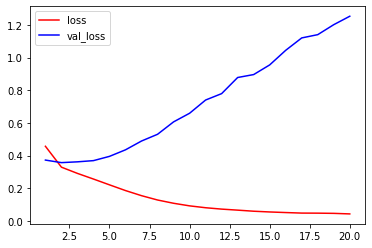

In [232]:
plt.plot(range(1,21), history.history['loss'], 'r', label='loss')
plt.plot(range(1,21), history.history['val_loss'], 'b', label='val_loss')
plt.legend()
plt.show()

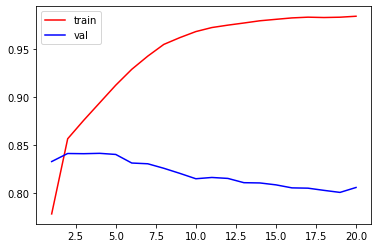

In [233]:
plt.plot(range(1,21), history.history['accuracy'], 'r', label='train')
plt.plot(range(1,21), history.history['val_accuracy'], 'b', label='val')
plt.legend()
plt.show()

### lstm

In [234]:
def get_lstm_model(input_shape, voca_size, word_vector_dim):
    inputs = keras.Input(shape=input_shape)
    x = keras.layers.Embedding(voca_size, word_vector_dim, input_shape=(None, ))(inputs)
    x = keras.layers.LSTM(8)(x)
    x =keras.layers.Dense(8, activation='relu')(x)
    outputs = keras.layers.Dense(1, activation='sigmoid')(x)
    
    return keras.Model(inputs,outputs)

In [235]:
lstm_model = get_lstm_model(input_shape, voca_size, word_vector_dim)
lstm_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 41)]              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 41, 16)            160000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [236]:
lstm_model.compile(
    optimizer = 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_lstm = lstm_model.fit(
    train_x, train_y,
    validation_data=(val_x, val_y),
    epochs = 20,
    batch_size=256
)

Epoch 1/20
457/457 [==============================] - 10s 7ms/step - loss: 0.4434 - accuracy: 0.7979 - val_loss: 0.3657 - val_accuracy: 0.8399
Epoch 2/20
457/457 [==============================] - 2s 5ms/step - loss: 0.3324 - accuracy: 0.8593 - val_loss: 0.3545 - val_accuracy: 0.8463
Epoch 3/20
457/457 [==============================] - 2s 5ms/step - loss: 0.3092 - accuracy: 0.8702 - val_loss: 0.3523 - val_accuracy: 0.8469
Epoch 4/20
457/457 [==============================] - 2s 5ms/step - loss: 0.2908 - accuracy: 0.8782 - val_loss: 0.3509 - val_accuracy: 0.8488
Epoch 5/20
457/457 [==============================] - 2s 5ms/step - loss: 0.2724 - accuracy: 0.8867 - val_loss: 0.3630 - val_accuracy: 0.8473
Epoch 6/20
457/457 [==============================] - 2s 5ms/step - loss: 0.2551 - accuracy: 0.8939 - val_loss: 0.3653 - val_accuracy: 0.8473
Epoch 7/20
457/457 [==============================] - 2s 5ms/step - loss: 0.2386 - accuracy: 0.9014 - val_loss: 0.3750 - val_accuracy: 0.8473
Epoch

In [240]:
results = lstm_model.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.6014 - accuracy: 0.8316
[0.6013917922973633, 0.8316007852554321]


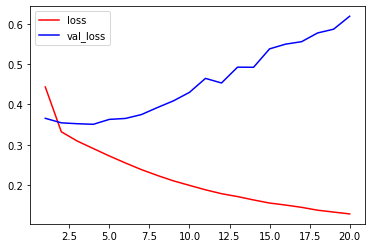

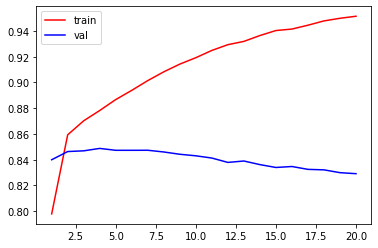

In [237]:
plt.plot(range(1,21), history_lstm.history['loss'], 'r', label='loss')
plt.plot(range(1,21), history_lstm.history['val_loss'], 'b', label='val_loss')
plt.legend()
plt.show()

plt.plot(range(1,21), history_lstm.history['accuracy'], 'r', label='train')
plt.plot(range(1,21), history_lstm.history['val_accuracy'], 'b', label='val')
plt.legend()
plt.show()